In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [8]:
img_path = "./img/image_4.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)  

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)
points = contour.squeeze()  

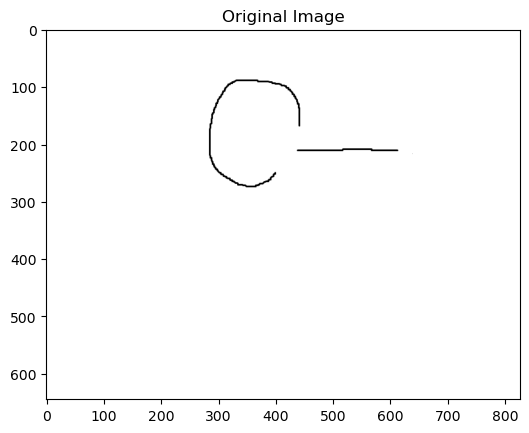

In [9]:
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.show()

In [10]:
t = np.linspace(0, 1, len(points))
fx = interp1d(t, points[:, 0], kind='cubic')
fy = interp1d(t, points[:, 1], kind='cubic')

t_new = np.linspace(0, 1, 100)
x_new = fx(t_new)
y_new = fy(t_new)

trajectory = np.vstack([x_new, y_new]).T

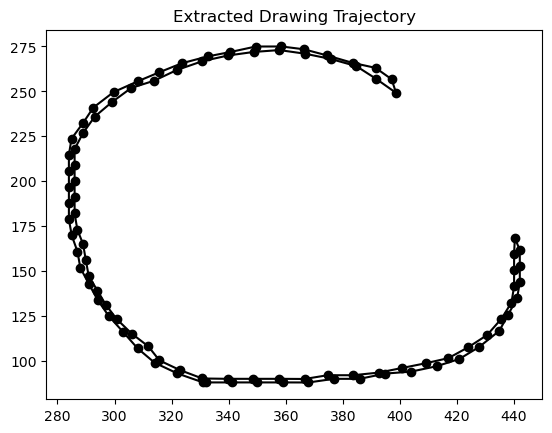

In [11]:
# plt.imshow(binary, cmap="gray_r") 
plt.plot(trajectory[:, 0], trajectory[:, 1], marker="o", linestyle="-", color="black")
plt.title("Extracted Drawing Trajectory")
plt.show()


e:\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
e:\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
e:\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


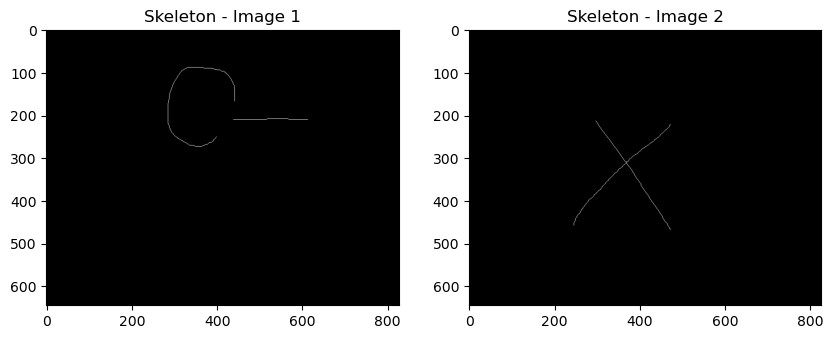

In [12]:
# Re-load images after execution state reset
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Define image paths
image_path_1 = "./img/image_4.png"
image_path_2 = "./img/image_5.png"

# Read grayscale images
img1 = cv2.imread(image_path_1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image_path_2, cv2.IMREAD_GRAYSCALE)

# Apply thresholding to invert colors (white background, black drawing)
_, binary1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY_INV)
_, binary2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY_INV)

# Normalize for skimage
binary1[binary1 > 0] = 1
binary2[binary2 > 0] = 1

# Perform skeletonization
skeleton1 = skeletonize(binary1)
skeleton2 = skeletonize(binary2)

# Extract skeleton pixel coordinates
y1, x1 = np.where(skeleton1 == 1)
y2, x2 = np.where(skeleton2 == 1)

# Convert to coordinate format
points1 = np.vstack((x1, y1)).T
points2 = np.vstack((x2, y2)).T

# Display the skeletonized images to inspect differences
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(skeleton1, cmap="gray")
axes[0].set_title("Skeleton - Image 1")
axes[1].imshow(skeleton2, cmap="gray")
axes[1].set_title("Skeleton - Image 2")
plt.show()

# # Check the number of extracted points in each image
# (len(points1), len(points2))


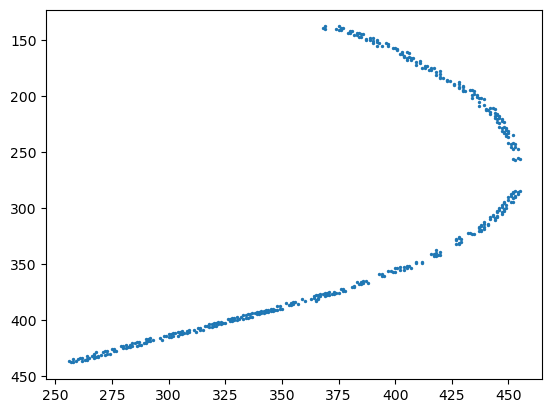

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取手绘图
img_path = "./img/image_1.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 反色（白底黑画）
img = cv2.bitwise_not(img)

# 二值化
_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# 轮廓检测
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 提取轨迹点
all_points = []
for contour in contours:
    for point in contour:
        x, y = point[0]
        all_points.append((x, y))

# 可视化轨迹
plt.scatter(*zip(*all_points), s=2)
plt.gca().invert_yaxis()
plt.show()


In [14]:
# 计算相对位移 Δx, Δy
strokes = []
prev_x, prev_y = all_points[0]
for x, y in all_points[1:]:
    dx = x - prev_x
    dy = y - prev_y
    strokes.append([dx, dy, 1, 0, 0])  # 继续画
    prev_x, prev_y = x, y

# 结束标志
strokes[-1][-1] = 1  # 最后一个点设为结束

print(strokes[:10])  # 预览数据


[[-1, 1, 1, 0, 0], [1, 1, 1, 0, 0], [5, 0, 1, 0, 0], [1, 1, 1, 0, 0], [1, 0, 1, 0, 0], [3, 3, 1, 0, 0], [1, 0, 1, 0, 0], [2, 2, 1, 0, 0], [1, 0, 1, 0, 0], [1, 1, 1, 0, 0]]


In [15]:
import cv2
import numpy as np

# 读取图片
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# 轮廓检测
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 采样轨迹点
sketch_data = []
for contour in contours:
    for i in range(1, len(contour)):
        x1, y1 = contour[i - 1][0]
        x2, y2 = contour[i][0]
        dx, dy = x2 - x1, y2 - y1
        sketch_data.append([dx, dy, 1, 0, 0])

sketch_data[-1][-1] = 1  # 结束符
print(sketch_data[:10])  # 预览


[[0, 644, 1, 0, 0], [825, 0, 1, 0, 0], [0, -644, 1, 0, 1]]


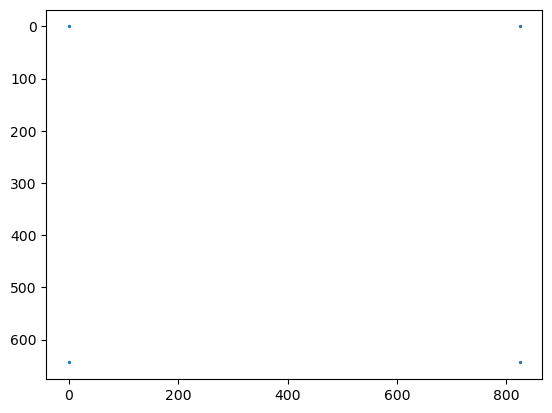

In [16]:
all_points = []
for contour in contours:
    for point in contour:
        x, y = point[0]
        all_points.append((x, y))

# 可视化轨迹
plt.scatter(*zip(*all_points), s=2)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# 读取手绘图片
img_path = "./img/image_2.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 转换为黑白二值图
_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# 保存为 PBM 格式
pbm_path = "./PBM/image_1.pbm"
cv2.imwrite(pbm_path, binary)

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'
